# Course Work by Andrei Kychinskii

### Short description.
In this course work is noted my attempt to make a model (i.g. classifier) for activity type recognition.
Data from three-axis MEMS accelerometr ('Ax', 'Ay', 'Az') [1] was collected from 36 persons during 6 different person's activities [2]:

1. Walking.
2. Jogging.
3. Upstairs.
4. Downstairs.
5. Sitting.
6. Standing.

References:
1. MEMS accelerometr, 1 min. video. 
    https://www.youtube.com/watch?v=RLQGZl0lpjQ
2. Original data source.
    http://www.cis.fordham.edu/wisdm/dataset.php

In [75]:
import math
import numpy  as np
import pandas as pd

In [76]:
# acti_df = pd.read_csv( 'H://files/Python/ITEA_Python_4_DataSci/CourseWork/HAR-CNN-Keras/actitracker_raw.txt', header = None, names = columnNames, na_values=';' )

columnNames = [ 'Person\'s ID','Activity Type','Records\'s ID','Ax','Ay','Az' ]
acti_df = pd.read_csv( 'D://ITEA_Python_4_DataSci/CourseWork/HAR-CNN-Keras/actitracker_raw.txt', header = None, names = columnNames, na_values=';' )

In [77]:
acti_df.head()

,Person's ID,Activity Type,Records's ID,Ax,Ay,Az
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164


In [78]:
acti_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098205 entries, 0 to 1098204
Data columns (total 6 columns):
Person's ID      1098205 non-null int64
Activity Type    1098205 non-null object
Records's ID     1098205 non-null int64
Ax               1098205 non-null float64
Ay               1098205 non-null float64
Az               1098204 non-null float64
dtypes: float64(3), int64(2), object(1)
memory usage: 50.3+ MB


In [79]:
acti_df.count()

Person's ID      1098205
Activity Type    1098205
Records's ID     1098205
Ax               1098205
Ay               1098205
Az               1098204
dtype: int64

In [24]:
# Plot numbers for every activity type (i.g. data records distribution)

In [80]:
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import FuncFormatter
import numpy as np

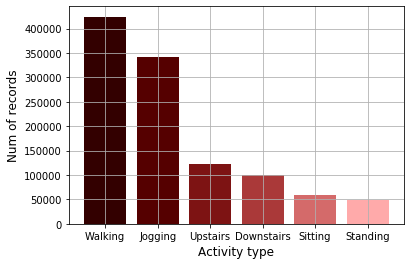

In [81]:
bars = acti_df['Activity Type'].value_counts().to_dict()
x = np.arange( len( bars.values() ) )
values = bars.values()
keys = bars.keys()
fig, ax = plt.subplots()
plt.bar( x, values, color = [ '#330000', '#550000', '#7D1313', '#AA3939', '#D46A6A', '#FFAAAA' ] )
plt.xticks(x, keys )
plt.xlabel( 'Activity type',  fontsize = 12 )
plt.ylabel( 'Num of records', fontsize = 12 )
plt.grid( True )
plt.show()

In [82]:
# Label-Encoding
# Substitute 'Activity Type' to numbers

activities_codes = pd.DataFrame( { 'ActivityID'   : [ 1, 2, 3, 4, 5, 6 ],
                                   'ActivityName' : [ 'Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing' ] 
                                 } )
activities = activities_codes.groupby( [ 'ActivityName' ] )

for key, activity in activities:
    acti_df.loc[ acti_df[ 'Activity Type' ]  == key, 'Activity Type' ] = activity[ 'ActivityID' ].values

In [83]:
# Check for NaN data
if( np.any(np.isnan(acti_df)) ):
    acti_df.fillna( 0, inplace = True )
    print('Filled!..')
else:
    print('No need to fill!..')

Filled!..


In [84]:
acti_df.describe()

,Person's ID,Activity Type,Records's ID,Ax,Ay,Az
count,1.098205e+06,1.098205e+06,1.098205e+06,1.098205e+06,1.098205e+06,1.098205e+06
mean,1.886067e+01,2.248334e+00,3.340904e+13,6.628673e-01,7.255633e+00,4.110609e-01
std,1.021422e+01,1.413767e+00,4.944966e+13,6.849055e+00,6.746205e+00,4.754105e+00
min,1.000000e+00,1.000000e+00,0.000000e+00,-1.961000e+01,-1.961000e+01,-1.980000e+01
25%,1.000000e+01,1.000000e+00,2.019112e+12,-2.870000e+00,3.170000e+00,-2.220000e+00
50%,1.900000e+01,2.000000e+00,9.722752e+12,2.700000e-01,7.930000e+00,0.000000e+00
75%,2.800000e+01,3.000000e+00,4.996567e+13,4.440000e+00,1.156000e+01,2.720000e+00
max,3.600000e+01,6.000000e+00,2.093974e+14,1.995000e+01,2.004000e+01,1.961000e+01


In [85]:
# Analyze data correlation
matrix_corr = acti_df.corr()
matrix_corr.style.background_gradient(cmap='coolwarm').set_precision(3)

,Person's ID,Activity Type,Records's ID,Ax,Ay,Az
Person's ID,1,0.0662,-0.288,0.0349,0.0407,-0.0045
Activity Type,0.0662,1,0.0823,-0.0547,-0.0835,0.189
Records's ID,-0.288,0.0823,1,-0.0563,-0.0716,0.0336
Ax,0.0349,-0.0547,-0.0563,1,0.0291,0.068
Ay,0.0407,-0.0835,-0.0716,0.0291,1,0.0174
Az,-0.0045,0.189,0.0336,0.068,0.0174,1


In [27]:
# Output:
# from matrix_corr table we can see extremely low correlation between Ax, Ay, Ax and Activity Type

In [86]:
# Creating additional feature 
acti_df[ 'A' ] = ( acti_df['Ax'] ** 2 + acti_df['Ay'] ** 2 + acti_df['Az'] ** 2 ) ** 0.5

In [87]:
# Now we try agina to analyze data correlation
matrix_corr = acti_df.corr()
matrix_corr.style.background_gradient(cmap='coolwarm').set_precision(3)

,Person's ID,Activity Type,Records's ID,Ax,Ay,Az,A
Person's ID,1,0.0662,-0.288,0.0349,0.0407,-0.0045,-0.00166
Activity Type,0.0662,1,0.0823,-0.0547,-0.0835,0.189,-0.105
Records's ID,-0.288,0.0823,1,-0.0563,-0.0716,0.0336,-0.0292
Ax,0.0349,-0.0547,-0.0563,1,0.0291,0.068,0.0365
Ay,0.0407,-0.0835,-0.0716,0.0291,1,0.0174,0.486
Az,-0.0045,0.189,0.0336,0.068,0.0174,1,0.0369
A,-0.00166,-0.105,-0.0292,0.0365,0.486,0.0369,1


In [30]:
# Output:
# 'A' is well correlate with 'Ay'.
# Possibly, for simple 'Activity Type' model we can use data from 'Ay' only.

In [88]:
acti_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098205 entries, 0 to 1098204
Data columns (total 7 columns):
Person's ID      1098205 non-null int64
Activity Type    1098205 non-null int64
Records's ID     1098205 non-null int64
Ax               1098205 non-null float64
Ay               1098205 non-null float64
Az               1098205 non-null float64
A                1098205 non-null float64
dtypes: float64(4), int64(3)
memory usage: 58.7 MB


In [89]:
# shuffle data
acti_df = acti_df.sample( frac = 1 ).reset_index( drop = True )

In [90]:
# Data for classifier
y = acti_df[ 'Activity Type' ].values

if( not np.any(np.isnan(y)) ):
    y
else:
    print('Data contains NaN value(s)')

In [91]:
X = acti_df.loc[ : , [ 'Ax', 'Ay', 'Az', 'A' ] ].values
# X = acti_df[ 'Ax' ].values
# np.any(np.isnan(X))
if( not np.any(np.isnan(X)) ):
    X
else:
    print('Data contains NaN value(s)')

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, auc

train_X, test_X, train_y, test_y = train_test_split( X, y, test_size = 0.2, random_state = 42 )

In [93]:
test_y

array([5, 2, 1, ..., 1, 2, 3], dtype=int64)

In [94]:
test_y

array([5, 2, 1, ..., 1, 2, 3], dtype=int64)

In [95]:
train_X

array([[ -0.23      ,   4.86      ,  -1.92      ,   5.23057358],
       [  8.92      ,   9.04      ,  -1.0351465 ,  12.74203784],
       [ -0.89      ,  13.53      ,   0.27240697,  13.56197646],
       ...,
       [  5.83      ,   6.13      ,  -3.11      ,   9.01320698],
       [ -2.14      ,   3.79      ,  -3.11      ,   5.3493738 ],
       [-15.62      ,  -7.86      ,  14.82      ,  22.921527  ]])

In [96]:
test_X

array([[ 3.3       ,  9.34      ,  1.0351465 ,  9.95977551],
       [ 9.85      , 15.28      ,  3.53      , 18.51922785],
       [ 7.55      , 10.19      ,  8.240311  , 15.12419669],
       ...,
       [ 2.64      , 14.94      , -1.4573772 , 15.24129746],
       [-9.47      ,  8.01      ,  2.1111538 , 12.58165213],
       [ 1.38      , 14.33      ,  3.6       , 14.83958557]])

In [97]:
[ train_y.shape, train_X.shape, test_y.shape, test_X.shape ]

[(878564,), (878564, 4), (219641,), (219641, 4)]

## Basic classification models

### KNN model for classification

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
model = KNeighborsClassifier( n_neighbors = 5, metric = "hamming", n_jobs = -1 )
model.fit( train_X, train_y )

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='hamming',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# )-:
# I have not proceeded success in evaluating the code lines, that noted below

In [ ]:
#predicted = model.predict( test_X )

In [39]:
# predicted_p = model.predict_proba( test_X )

### Logistic Regression Model

In [66]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report, confusion_matrix

log_reg = LogisticRegression( C = 1.0 )
lf = log_reg.fit( train_X, train_y )

c:\users\a\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\a\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [67]:
pred_y_lf = lf.predict(test_X)

In [68]:
print( accuracy_score( test_y, pred_y_lf ) )

0.5124453084806571


In [70]:
print( f1_score( test_y, pred_y_lf, average = 'micro' ) )

0.5124453084806571


In [72]:
predicted_p = lf.predict_proba(test_X)

In [ ]:
# print(roc_auc_score(y_score=predicted_p[:,1], y_true=test_y-1))

In [75]:
log_reg = LogisticRegression( C=0.01, 
                             class_weight="balanced",
                             n_jobs=-1 )
lf = log_reg.fit(train_X, train_y)
y_pred = lf.predict(test_X)

print(confusion_matrix(test_y, y_pred))
print(classification_report(test_y, y_pred))
print("Accuracy:", str(accuracy_score(test_y, y_pred)))
y_pred_p = lf.predict_proba(test_X)

# String below make an error
# print("AUC: " + str(roc_auc_score(y_score=y_pred_p[:,1], y_true=test_y-1)))

c:\users\a\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\a\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\a\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[[49182 11462   142   657  4067 19496]
 [19601 30127   204   381  9792  8527]
 [11611  3072    53   140  1923  7842]
 [ 9234  1868    30   189  1380  7261]
 [  712   369     0     0 10632   113]
 [ 2630   686     0     0     3  6255]]
              precision    recall  f1-score   support

           1       0.53      0.58      0.55     85006
           2       0.63      0.44      0.52     68632
           3       0.12      0.00      0.00     24641
           4       0.14      0.01      0.02     19962
           5       0.38      0.90      0.54     11826
           6       0.13      0.65      0.21      9574

    accuracy                           0.44    219641
   macro avg       0.32      0.43      0.31    219641
weighted avg       0.46      0.44      0.42    219641

Accuracy: 0.43907102954366445


In [77]:
for i in [ 1, 0.5, 0.1, 0.01, 0.001, 0.0001 ]:
    log_reg = LogisticRegression( C = i, class_weight="balanced", n_jobs=-1 )
    lf = log_reg.fit( train_X, train_y )
    y_pred_lf = lf.predict( test_X )
    print( i, ' - Accuracy score is ' + str( accuracy_score( test_y, pred_y_lf ) ) )

c:\users\a\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\a\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\a\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


1  - Accuracy score is 0.5124453084806571


c:\users\a\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\a\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\a\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


0.5  - Accuracy score is 0.5124453084806571


c:\users\a\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\a\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\a\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


0.1  - Accuracy score is 0.5124453084806571


c:\users\a\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\a\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\a\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


0.01  - Accuracy score is 0.5124453084806571


c:\users\a\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\a\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\a\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


0.001  - Accuracy score is 0.5124453084806571


c:\users\a\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\a\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\a\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


0.0001  - Accuracy score is 0.5124453084806571


In [215]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report, confusion_matrix

In [216]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2) 

X_poly_train = poly_features.fit_transform(train_X)
X_poly_test = poly_features.fit_transform(test_X)

# for i in [1,0.5,0.1,0.01,0.001,0.0001]:
for i in [1,0.5]:
    log_reg = LogisticRegression(C=i, class_weight="balanced",n_jobs=-1)
    lf = log_reg.fit(X_poly_train, train_y)
    pred_y_p = lf.predict(X_poly_test)
    print( i, ' - Accuracy score is ' + str( accuracy_score( test_y, pred_y_p ) ) )

c:\users\а\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\а\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\а\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 3.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


1  - Accuracy score is 0.5632645999608452


c:\users\а\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\а\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\а\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 3.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


0.5  - Accuracy score is 0.5560437258981702


c:\users\а\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### SVM

In [80]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import LinearSVC

svm_clf = Pipeline((
        ("poly_features", PolynomialFeatures(degree=2)), #1. Створення поліномних фіч
        ("scaler", StandardScaler()),                    #2. Нормалізація
        ("svm_clf", LinearSVC(C=1))      #3. Навчання моделі
))

svm_clf.fit(train_X, train_y)
p = svm_clf.predict(test_X)

print(confusion_matrix(test_y, p))
print(classification_report(test_y, p))
print("Accuracy:", str(accuracy_score(test_y, p)))

c:\users\a\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[[70396 13654     0     0   588   368]
 [21644 45287     0     0  1546   155]
 [19660  4299     0     1   366   315]
 [16596  2891     0     0   268   207]
 [  828   570     0     0 10424     4]
 [ 8175     4     0     0     0  1395]]


c:\users\a\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.51      0.83      0.63     85006
           2       0.68      0.66      0.67     68632
           3       0.00      0.00      0.00     24641
           4       0.00      0.00      0.00     19962
           5       0.79      0.88      0.83     11826
           6       0.57      0.15      0.23      9574

    accuracy                           0.58    219641
   macro avg       0.43      0.42      0.39    219641
weighted avg       0.48      0.58      0.51    219641

Accuracy: 0.5805018188771678


## LDA 

In [56]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [74]:
# Test solvers:
# solver='lsqr'
# solver='eigen'
# solver='svd'

accuracy_score_lsqr = accuracy_score_eigen = accuracy_score_svd = 0

clf = LinearDiscriminantAnalysis( solver='lsqr', shrinkage='auto' )
clf.fit(train_X, train_y)
y_pred_LDA_lsqr = clf.predict(test_X)
accuracy_score_lsqr = accuracy_score( test_y, y_pred_LDA_lsqr )

clf = LinearDiscriminantAnalysis( solver='eigen', shrinkage='auto' )
clf.fit(train_X, train_y)
y_pred_LDA_eigen = clf.predict(test_X)
accuracy_score_eigen = accuracy_score( test_y, y_pred_LDA_eigen )

clf = LinearDiscriminantAnalysis( solver='svd', shrinkage=None )
clf.fit(train_X, train_y)
y_pred_LDA_svd = clf.predict(test_X)
accuracy_score_svd = accuracy_score( test_y, y_pred_LDA_svd )

# print("AUC: " + str( roc_auc_score( y_score = y_pred[ : , 1 ], y_true = test_y - 1 ) ) )
print("LDA:")
print( "- accuracy = %0.12f, solver='lsqr'" % accuracy_score_lsqr )
print( "- accuracy = %0.12f, solver='eigen'" % accuracy_score_eigen )
print( "- accuracy = %0.12f, solver='svd', " % accuracy_score_svd )
print("\nMax LDA accuracy is: %0.8f" % max( [ accuracy_score_lsqr, accuracy_score_eigen, accuracy_score_svd ] ) )

LDA:
- accuracy = 0.494525156961, solver='lsqr'
- accuracy = 0.494525156961, solver='eigen'
- accuracy = 0.494534262729, solver='svd', 

Max LDA accuracy is: 0.49453426


## QDA

In [49]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [50]:
for _req_param in [ 0.0, 0.01, 0.05 ] + [ i * 0.1 for i in range(1, 11) ]:
    clf = QuadraticDiscriminantAnalysis(reg_param=_req_param)
    clf.fit(train_X, train_y)
    y_pred_QDA = clf.predict(test_X)
    print("QDA, reg_param = %0.2f, accuracy = %0.4f" % (_req_param, accuracy_score( test_y, y_pred_QDA ) ) )

QDA, reg_param = 0.00, accuracy = 0.5540
QDA, reg_param = 0.01, accuracy = 0.5536
QDA, reg_param = 0.05, accuracy = 0.5532
QDA, reg_param = 0.10, accuracy = 0.5539
QDA, reg_param = 0.20, accuracy = 0.5559
QDA, reg_param = 0.30, accuracy = 0.5598
QDA, reg_param = 0.40, accuracy = 0.5631
QDA, reg_param = 0.50, accuracy = 0.5752
QDA, reg_param = 0.60, accuracy = 0.5731
QDA, reg_param = 0.70, accuracy = 0.5616
QDA, reg_param = 0.80, accuracy = 0.5419
QDA, reg_param = 0.90, accuracy = 0.5138
QDA, reg_param = 1.00, accuracy = 0.3410


In [73]:
# search for model's accuracy in reg_param belongs to [ 0.4 .. 0.60 ]
QDA_accuracies = []
for _req_param in [ 0.4 + i * 0.01 for i in range(0, 21) ]:
    clf = QuadraticDiscriminantAnalysis(reg_param=_req_param)
    clf.fit(train_X, train_y)
    y_pred_QDA = clf.predict(test_X)
    QDA_accuracy = accuracy_score( test_y, y_pred_QDA )
    QDA_accuracies.append( QDA_accuracy )
    print("QDA, reg_param = %0.2f, accuracy = %0.4f" % (_req_param, QDA_accuracy ) )
print("\nMax QDA accuracy is: %0.8f" % max(QDA_accuracies) )

QDA, reg_param = 0.40, accuracy = 0.5631
QDA, reg_param = 0.41, accuracy = 0.5635
QDA, reg_param = 0.42, accuracy = 0.5637
QDA, reg_param = 0.43, accuracy = 0.5639
QDA, reg_param = 0.44, accuracy = 0.5642
QDA, reg_param = 0.45, accuracy = 0.5745
QDA, reg_param = 0.46, accuracy = 0.5746
QDA, reg_param = 0.47, accuracy = 0.5749
QDA, reg_param = 0.48, accuracy = 0.5749
QDA, reg_param = 0.49, accuracy = 0.5752
QDA, reg_param = 0.50, accuracy = 0.5752
QDA, reg_param = 0.51, accuracy = 0.5751
QDA, reg_param = 0.52, accuracy = 0.5749
QDA, reg_param = 0.53, accuracy = 0.5747
QDA, reg_param = 0.54, accuracy = 0.5740
QDA, reg_param = 0.55, accuracy = 0.5738
QDA, reg_param = 0.56, accuracy = 0.5740
QDA, reg_param = 0.57, accuracy = 0.5739
QDA, reg_param = 0.58, accuracy = 0.5737
QDA, reg_param = 0.59, accuracy = 0.5734
QDA, reg_param = 0.60, accuracy = 0.5731

Max QDA accuracy is: 0.57522503


## Naive Bayes

In [99]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
nb = gnb.fit( train_X, train_y )
y_pred_Gaussian = nb.predict( test_X )

print("Accuracy:", str( accuracy_score( test_y, y_pred_Gaussian ) ) )

Accuracy: 0.5835568040575302


In [100]:
from sklearn.ensemble import BaggingClassifier

In [123]:
gnb = BaggingClassifier(GaussianNB(), 
                        max_features=4, 
                        max_samples=0.95, 
                        random_state=42)
nb = gnb.fit(train_X, train_y)
y_pred_BaggingC = nb.predict(test_X)

print("Accuracy:", str( accuracy_score( test_y, y_pred_BaggingC ) ) )

Accuracy: 0.5835613569415546


In [121]:
from sklearn.naive_bayes import BernoulliNB

clf = BernoulliNB()
nb = clf.fit(train_X, train_y)
y_pred_BernoulliNB = nb.predict(test_X)

print("Accuracy:", str( accuracy_score( test_y, y_pred_BernoulliNB ) ) )

Accuracy: 0.4728625347726517


## Decision Tree 

In [124]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(
    max_depth=10, 
    min_samples_leaf=21, 
    max_features=0.9, 
    criterion="gini",                                    
    random_state=1)
dt = tree_clf.fit(train_X, train_y)
y_pred_dt = dt.predict(test_X)
print("Accuracy:", str( accuracy_score( test_y, y_pred_dt ) ) )

Accuracy: 0.6247330871740704


In [126]:
for i in range(6,15):
    for j in range(10,30):
        tree_clf = DecisionTreeClassifier(max_depth=i, 
                                          min_samples_leaf=j,
                                          max_features=0.9, 
                                          criterion="gini", random_state=1)  
        dt = tree_clf.fit(train_X, train_y)
        y_pred_dt = dt.predict(test_X)
        print(str(i)+"- Accuracy: " + str( accuracy_score( test_y, y_pred_dt ) ) + " leaf: "+str(j))

6- Accuracy: 0.6026060708155582 leaf: 10
6- Accuracy: 0.6026060708155582 leaf: 11
6- Accuracy: 0.6026151765836069 leaf: 12
6- Accuracy: 0.6026151765836069 leaf: 13
6- Accuracy: 0.6026151765836069 leaf: 14
6- Accuracy: 0.6026151765836069 leaf: 15
6- Accuracy: 0.6026151765836069 leaf: 16
6- Accuracy: 0.6026151765836069 leaf: 17
6- Accuracy: 0.6026151765836069 leaf: 18
6- Accuracy: 0.6026151765836069 leaf: 19
6- Accuracy: 0.6026151765836069 leaf: 20
6- Accuracy: 0.6026151765836069 leaf: 21
6- Accuracy: 0.6026151765836069 leaf: 22
6- Accuracy: 0.6026151765836069 leaf: 23
6- Accuracy: 0.6026151765836069 leaf: 24
6- Accuracy: 0.6026151765836069 leaf: 25
6- Accuracy: 0.6026151765836069 leaf: 26
6- Accuracy: 0.6026151765836069 leaf: 27
6- Accuracy: 0.6026151765836069 leaf: 28
6- Accuracy: 0.6026151765836069 leaf: 29
7- Accuracy: 0.6007894700898284 leaf: 10
7- Accuracy: 0.6007894700898284 leaf: 11
7- Accuracy: 0.6007894700898284 leaf: 12
7- Accuracy: 0.5957403217067851 leaf: 13
7- Accuracy: 0.5

In [127]:
# Decision Tree algo gave no more than 0.637 accuracy

### Output.
Best result for basic classification models is no more than 0.64.

# Ensembles

Ансамбль алгоритмов (методов) — метод, который использует несколько обучающих алгоритмов с целью получения лучшей
эффективности прогнозирования, чем можно было бы получить от каждого обучающего алгоритма по отдельности.
http://neerc.ifmo.ru/wiki/index.php?title=Виды_ансамблей

## Random Forest
https://ru.wikipedia.org/wiki/Random_forest

In [128]:
from sklearn.ensemble import RandomForestClassifier

In [135]:
rnd_clf = RandomForestClassifier(max_depth=12,
                                 n_estimators=60,
                                 max_leaf_nodes=None, 
                                 min_samples_leaf = 4,                                   
                                 n_jobs=-1,
                                 verbose=1, 
                                 random_state=4)

rnd_clf.fit(train_X, train_y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  3.5min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=12, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=-1,
                       oob_score=False, random_state=4, verbose=1,
                       warm_start=False)

In [136]:
y_pred_rf = rnd_clf.predict(test_X)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    1.7s
[Parallel(n_jobs=3)]: Done  60 out of  60 | elapsed:    2.3s finished


In [137]:
print("Random Forest:")
print("Accuracy:", str( accuracy_score( test_y, y_pred_rf ) ) )

Random Forest:
Accuracy: 0.638792393041372


## Lightgbm

In [248]:
import lightgbm

# transform classes from [ 1.. 6 ] to [ 0..5 ]
train_y = train_y - 1
test_y  = test_y - 1

train_data = lightgbm.Dataset(train_X, label=train_y)
test_data = lightgbm.Dataset(test_X, label=test_y)

parameters = {
    'objective': 'multiclass', # classification
    'num_class': 6, # number of classes
    'metric': 'multi_logloss',
    'is_unbalance': 'true',
    'boosting': 'gbdt',
    'max_depth': 7,
    'num_leaves': 40,
    'feature_fraction': 0.4,
    'bagging_fraction': 0.6,
    'bagging_freq': 15,
    'learning_rate': 0.01,
    'verbose': 0
}

In [249]:
lgb_model = lightgbm.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=2000,
                       early_stopping_rounds=15)

[1]	valid_0's multi_logloss: 1.48553
Training until validation scores don't improve for 15 rounds.
[2]	valid_0's multi_logloss: 1.48288
[3]	valid_0's multi_logloss: 1.48038
[4]	valid_0's multi_logloss: 1.4778
[5]	valid_0's multi_logloss: 1.47538
[6]	valid_0's multi_logloss: 1.47287
[7]	valid_0's multi_logloss: 1.47051
[8]	valid_0's multi_logloss: 1.46807
[9]	valid_0's multi_logloss: 1.46576
[10]	valid_0's multi_logloss: 1.46338
[11]	valid_0's multi_logloss: 1.46113
[12]	valid_0's multi_logloss: 1.45882
[13]	valid_0's multi_logloss: 1.45662
[14]	valid_0's multi_logloss: 1.45436
[15]	valid_0's multi_logloss: 1.45221
[16]	valid_0's multi_logloss: 1.45003
[17]	valid_0's multi_logloss: 1.44794
[18]	valid_0's multi_logloss: 1.44581
[19]	valid_0's multi_logloss: 1.44376
[20]	valid_0's multi_logloss: 1.44168
[21]	valid_0's multi_logloss: 1.43968
[22]	valid_0's multi_logloss: 1.43765
[23]	valid_0's multi_logloss: 1.43569
[24]	valid_0's multi_logloss: 1.4337
[25]	valid_0's multi_logloss: 1.43181

In [250]:
y_predicted_lgbm = lgb_model.predict( test_X )

In [251]:
y_vals_predicted_lgbm = []

for item in y_predicted_lgbm:
    y_vals_predicted_lgbm.append( np.argmax( item ) )

y_vals_predicted_lgbm[ : 10]

[1, 0, 0, 0, 0, 1, 1, 0, 0, 0]

In [252]:
test_y[ : 10]

array([4, 1, 0, 1, 3, 0, 3, 0, 1, 4], dtype=int64)

In [259]:
print("Accuracy:", str(accuracy_score( test_y, y_vals_predicted_lgbm ) ) )

Accuracy: 0.5817265446797274


### Output.
Ensembles have given accuracy no more than 0.64, like basic classification algorithms.
I suppose, that ensembles need precise input parametras tuning. Due to limited computational power of my PC, I have decided to stop with this results.